# Perform "Exploratory Data Analysis" on Dataset "Mall-Customer"

 Author-Bhagyashri Kadvekar

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")


In [25]:
df = pd.read_csv(r"C:\Users\admin\Downloads\Mall_Customers.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [26]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


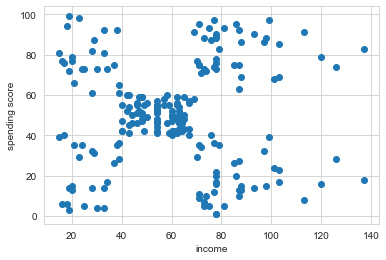

In [27]:
plt.scatter(df['Annual Income (k$)'],
           df['Spending Score (1-100)'])
plt.xlabel('income')
plt.ylabel('spending score')
plt.show()

In [28]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


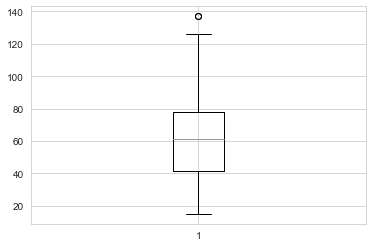

In [29]:
plt.boxplot(df['Annual Income (k$)']);

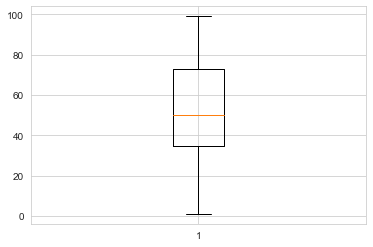

In [30]:
plt.boxplot(df['Spending Score (1-100)']);

In [31]:
df.sort_values(by='Annual Income (k$)',ascending =False)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
199,200,Male,30,137,83
198,199,Male,32,137,18
197,198,Male,32,126,74
196,197,Female,45,126,28
195,196,Female,35,120,79
...,...,...,...,...,...
5,6,Female,22,17,76
2,3,Female,20,16,6
3,4,Female,23,16,77
1,2,Male,21,15,81


In [32]:
q3 = np.percentile(df['Annual Income (k$)'],75)
q1 =  np.percentile(df['Annual Income (k$)'],25)
outlier = q3+1.5*(q3-q1)

df[df['Annual Income (k$)']>outlier]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [33]:
new_df = df.iloc[:198,:]

In [34]:
new_df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


# Find a range of customers according to age group in    Mall_customers.

<AxesSubplot:xlabel='Age', ylabel='Count'>

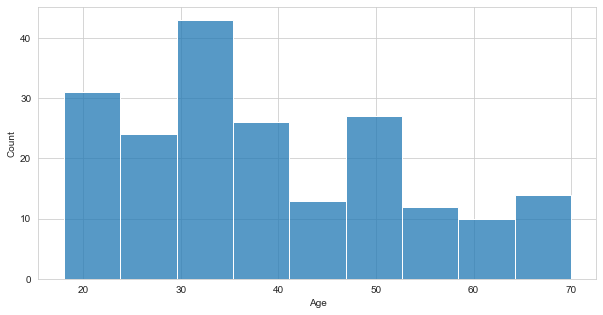

In [35]:
plt.figure(figsize=(10,5))
sns.histplot(x="Age",data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

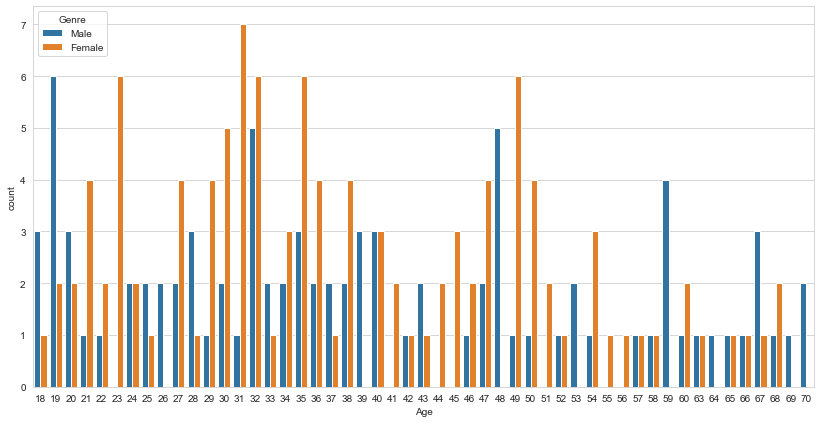

In [36]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,7))
sns.countplot("Age",data=df,hue='Genre')

In [37]:
from sklearn.cluster import KMeans

In [40]:
wcss = []
k = np.arange(1,11)
for cluster  in k:
    model = KMeans(cluster ,random_state =123)
    model.fit(new_df.iloc[:,2:].values)
    wcss.append(model.inertia_)

In [41]:
wcss

[294769.41919191915,
 200578.87719298236,
 138080.80227017772,
 99104.20215403377,
 70156.88335602349,
 53133.13742109284,
 47651.03140605527,
 42452.23800280799,
 39421.88521187347,
 35794.38871923096]

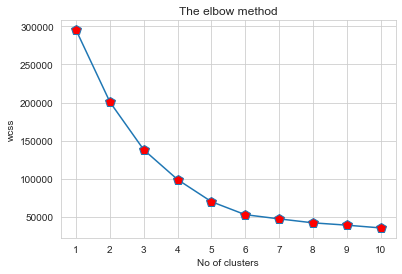

In [42]:
plt.plot (k,wcss, marker ='p',mfc='r',ms=10)
plt.xlabel ('No of clusters')
plt.ylabel ("wcss")
plt.xticks(k)
plt.title("The elbow method")
plt.show()

In [44]:
X = new_df.iloc[:,2:].values
final_model =KMeans(n_clusters=5)
final_model.fit(X)
print(X.shape)

(198, 3)


In [45]:
row_clusters = final_model.predict(X)
row_clusters

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1,
       2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 4, 1, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4])

In [46]:
row_clusters==0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,

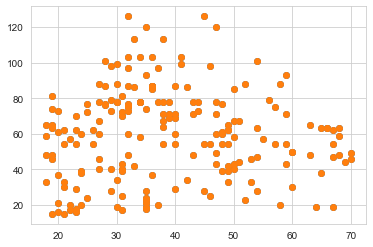

In [47]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[:,0], X[:,1])

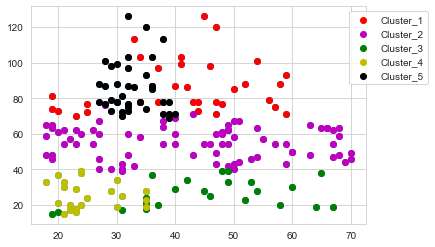

In [48]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[row_clusters==0,0],X[row_clusters==0,1],c='r',label='Cluster_1') 
plt.scatter(X[row_clusters==1,0],X[row_clusters==1,1],c='m',label='Cluster_2')
plt.scatter(X[row_clusters==2,0],X[row_clusters==2,1],c='g',label='Cluster_3')
plt.scatter(X[row_clusters==3,0],X[row_clusters==3,1],c='y',label='Cluster_4')
plt.scatter(X[row_clusters==4,0],X[row_clusters==4,1],c='k',label='Cluster_5')
plt.legend(bbox_to_anchor =(1.2,1))
plt.show()

In [49]:
final_model.cluster_centers_

array([[40.91428571, 86.34285714, 17.57142857],
       [42.9375    , 55.0875    , 49.7125    ],
       [45.2173913 , 26.30434783, 20.91304348],
       [25.27272727, 25.72727273, 79.36363636],
       [32.76315789, 85.21052632, 82.10526316]])

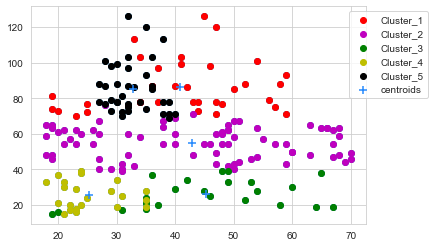

In [50]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[row_clusters==0,0],X[row_clusters==0,1],c='r',label='Cluster_1') 
plt.scatter(X[row_clusters==1,0],X[row_clusters==1,1],c='m',label='Cluster_2')
plt.scatter(X[row_clusters==2,0],X[row_clusters==2,1],c='g',label='Cluster_3')
plt.scatter(X[row_clusters==3,0],X[row_clusters==3,1],c='y',label='Cluster_4')
plt.scatter(X[row_clusters==4,0],X[row_clusters==4,1],c='k',label='Cluster_5')
plt.scatter(final_model.cluster_centers_[:,0],
           final_model.cluster_centers_[:,1],s=50,marker='+',
           color='#2589fd', label='centroids')
plt.legend(bbox_to_anchor =(1.2,1))
plt.show()